**Credit information learning**

**[Problem 1] Confirmation of competition contents**

To learn: Information about customers (telco, transactional info, etc.)

To predict: Client's repayment abilities.

To submit: Create csv submission file containing SK_ID_CURR & TARGET headers.

Evaluation: Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

**[Problem 2] Learning and verification**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('./application_train.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461.0,-637.0,-3648.0,-2120.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,WEDNESDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765.0,-1188.0,-1186.0,-291.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Core staff,2.0,1.0,1.0,MONDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,MONDAY,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,NaN,1.0,1.0,0.0,1.0,0.0,0.0,Laborers,2.0,2.0,2.0,WEDNESDAY,17.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932.0,-3038.0,-4311.0,-3458.0,NaN,1.0,1.0,0.0,1.0,0.0,0.0,Core staff,1.0,2.0,2.0,THURSDAY,11.0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,100881.000000,100881.000000,100880.000000,1.008800e+05,1.008800e+05,100873.000000,1.007990e+05,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,34288.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100879.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,44103.000000,1.006650e+05,80863.000000,49726.000000,41988.000000,51728.000000,33926.000000,30502.000000,47091.000000,50132.000000,50731.000000,...,50132.000000,50731.000000,32559.000000,41088.000000,31987.000000,50263.000000,30967.000000,45304.000000,52208.000000,100549.000000,100549.000000,100549.000000,100549.000000,100879.000000,100880.00000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,87310.000000,87310.000000,87310.000000,87310.000000,87310.000000,87310.000000
mean,158517.898246,0.080987,0.417506,1.694316e+05,5.989619e+05,27090.703999,5.383228e+05,0.020844,-16026.708803,63280.748692,-4983.608228,-2994.214463,12.027561,0.999990,0.821312,0.199732,0.997998,0.278489,0.056186,2.155830,2.053569,2.032563,12.057821,0.014988,0.050297,0.039939,0.079005,0.231364,0.179411,0.502832,5.142794e-01,0.510480,0.117309,0.088767,0.977599,0.751694,0.045003,0.078472,0.150077,0.225804,...,0.149527,0.225475,0.231355,0.067036,0.101669,0.108612,0.008854,0.028013,0.102568,1.422500,0.141911,1.405713,0.098440,-962.968636,0.00005,0.712292,0.000139,0.015285,0.086816,0.000198,0.080938,0.003668,0.000020,0.004104,0.000010,0.003519,0.002994,0.001110,0.010170,0.000238,0.008297,0.000644,0.000506,0.000327,0.006586,0.007296,0.033982,0.269087,0.265926,1.892544
std,33777.610265,0.272816,0.721141,3.819431e+05,4.020557e+05,14462.519581,3.694192e+05,0.013813,4368.281423,140829.749114,3523.590305,1511.147869,11.856103,0.003148,0.383092,0.399801,0.044703,0.448258,0.230281,0.909135,0.509727,0.503244,3.262256,0.121506,0.218559,0.195816,0.269748,0.421707,0.383698,0.211490,1.914565e-01,0.195095,0.108287,0.082997,0.059743,0.113855,0.078157,0.134053,0.100366,0.144909,...,0.100693,0.145396,0.162056,0.081118,0.093950,0.112689,0.048312,0.069156,0.108209,2.314364,0.439321,2.294728,0.355617,828.243345,0.00704,0.452697,0.011780,0.122687,0.281567,0.014079,0.272741,0.060451,0.004453,0.063930,0.003148,0.059217,0.054633,0.033302,0.100335,0.0

In [ ]:
print("Training data shape:", df.shape)

Training data shape: (100881, 122)


In [ ]:
# Check missing values
def check_missing(df):
  miss_dict = {}
  for columns in df:
    count = df[columns].isna().sum()
    ratio = count/len(df[columns])
    datatype = df[columns].dtype
    miss_dict[columns] = [count, ratio, datatype]

  return miss_dict

In [ ]:
miss_ratio = pd.DataFrame(check_missing(df), ['Total', 'Ratio', 'Type']).T
miss_ratio

,Total,Ratio,Type
SK_ID_CURR,0,0,int64
TARGET,0,0,int64
NAME_CONTRACT_TYPE,0,0,object
CODE_GENDER,1,9.91267e-06,object
FLAG_OWN_CAR,1,9.91267e-06,object
...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,13571,0.134525,float64
AMT_REQ_CREDIT_BUREAU_WEEK,13571,0.134525,float64
AMT_REQ_CREDIT_BUREAU_MON,13571,0.134525,float64
AMT_REQ_CREDIT_BUREAU_QRT,13571,0.134525,float64


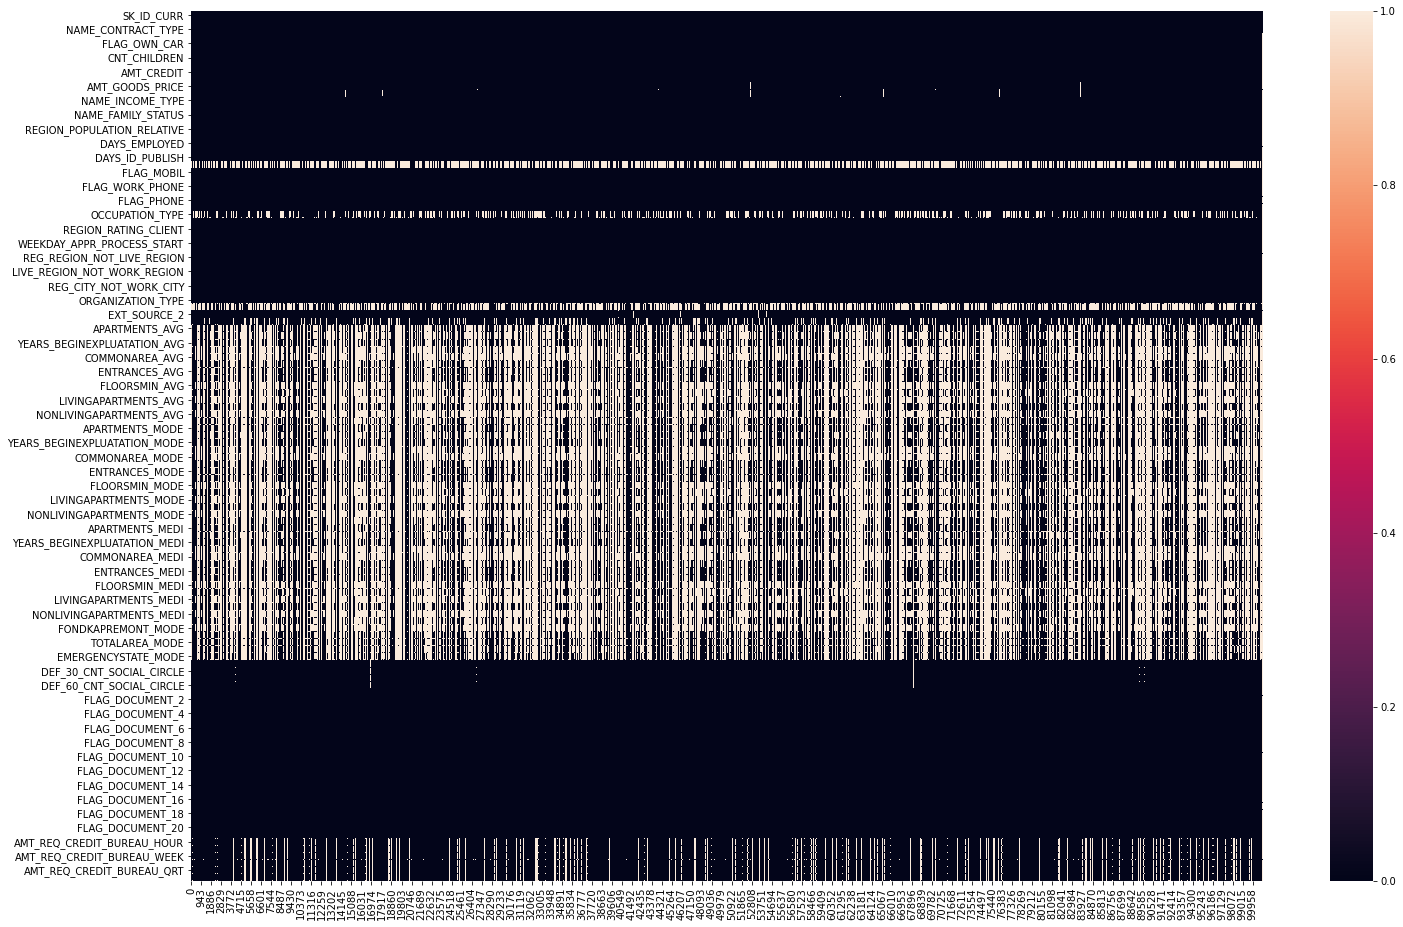

In [ ]:
# Show heatmap of missing value amount
plt.figure(figsize=(24, 16))
sns.heatmap(df.isna().T)
plt.show()

In [ ]:
# Displaying feature having missing ratio > 0
miss_feature = miss_ratio[miss_ratio.Ratio > 0]
print("Total feature missing values: {}".format(len(miss_feature)))
miss_feature

Total feature missing values: 119


,Total,Ratio,Type
CODE_GENDER,1,9.91267e-06,object
FLAG_OWN_CAR,1,9.91267e-06,object
FLAG_OWN_REALTY,1,9.91267e-06,object
CNT_CHILDREN,1,9.91267e-06,float64
AMT_INCOME_TOTAL,1,9.91267e-06,float64
...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,13571,0.134525,float64
AMT_REQ_CREDIT_BUREAU_WEEK,13571,0.134525,float64
AMT_REQ_CREDIT_BUREAU_MON,13571,0.134525,float64
AMT_REQ_CREDIT_BUREAU_QRT,13571,0.134525,float64


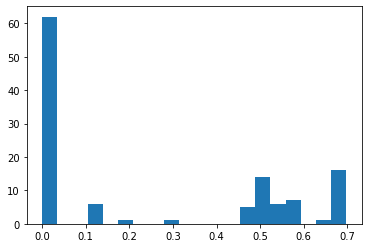

In [ ]:
plt.hist(miss_feature['Ratio'], bins=20)
plt.show()

In [ ]:
df_train = pd.read_csv('./application_train.csv')
df_test = pd.read_csv('./application_test.csv')

In [ ]:
target = df_train['TARGET'] 
df_train = df_train.drop('TARGET', axis=1)

In [ ]:
test_index = df_test['SK_ID_CURR']
df_total = pd.concat([df_train, df_test])
df_total = df_total.drop('SK_ID_CURR', axis=1)
print("The shape of our full dataset: {}".format(df_total.shape))

The shape of our full dataset: (155453, 120)


In [ ]:
# Encoding categorical to numerical
from sklearn.preprocessing import LabelEncoder

label_en = LabelEncoder()

In [ ]:
for columns in df_total.columns[1:]:
  if df_total[columns].dtype == 'object':
    if len(list(df_total[columns].unique())) <= 2:
      label_en.fit(df_total[columns])
      df_total[columns] = label_en.transform(df_total[columns])

In [ ]:
df_total = pd.get_dummies(df_total)

print("The shape of full ENCODED dataset: {}".format(df_total.shape))

The shape of full ENCODED dataset: (155453, 242)


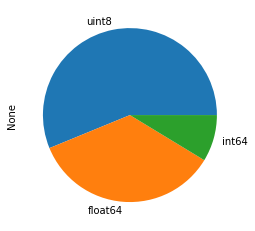

In [ ]:
df_total.dtypes.value_counts().plot.pie()
plt.show()

In [ ]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from sklearn.impute import SimpleImputer

def fill_missing_value(df):
  new_df = df
  imr = SimpleImputer(missing_values=np.NaN, strategy='median')
  for columns in new_df.columns[2:]:
    imr_all = imr.fit(new_df[[columns]])
    new_df[columns] = imr_all.transform(new_df[[columns]]).ravel()
  return new_df

In [ ]:
df_total = fill_missing_value(df_total)

In [ ]:
miss_ratio_full = pd.DataFrame(check_missing(df_total), ['Total', 'Ratio', 'Type']).T
miss_ratio_full

,Total,Ratio,Type
FLAG_OWN_CAR,0,0,int64
FLAG_OWN_REALTY,0,0,int64
CNT_CHILDREN,0,0,float64
AMT_INCOME_TOTAL,0,0,float64
AMT_CREDIT,0,0,float64
...,...,...,...
WALLSMATERIAL_MODE_Panel,0,0,float64
"WALLSMATERIAL_MODE_Stone, brick",0,0,float64
WALLSMATERIAL_MODE_Wooden,0,0,float64
EMERGENCYSTATE_MODE_No,0,0,float64


In [ ]:
target

0         1
1         0
2         0
3         0
4         0
         ..
106704    0
106705    0
106706    0
106707    0
106708    0
Name: TARGET, Length: 106709, dtype: int64

**[Problem 3] Estimation on test data**

In [ ]:
df_total.iloc[0 : len(target), :].values

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
target.values

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
train_df_after_preprocess = pd.concat([target, df_total.iloc[0 : len(target), :]] , axis=1)
test_df_after_preprocess = df_total.iloc[len(target) : , :]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

log_reg_model = LogisticRegression(random_state = 40)

log_reg_model.fit(train_df_after_preprocess.drop(columns='TARGET'), train_df_after_preprocess['TARGET'])
log_reg_pred = log_reg_model.predict(test_df_after_preprocess)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
output_df = pd.DataFrame({"SK_ID_CURR": test_index,
                          "TARGET": log_reg_pred})

In [ ]:
output_df

,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0
...,...,...
48739,456221,0
48740,456222,0
48741,456223,0
48742,456224,0


In [ ]:
output_df.to_csv("./log_reg.csv", index=False)

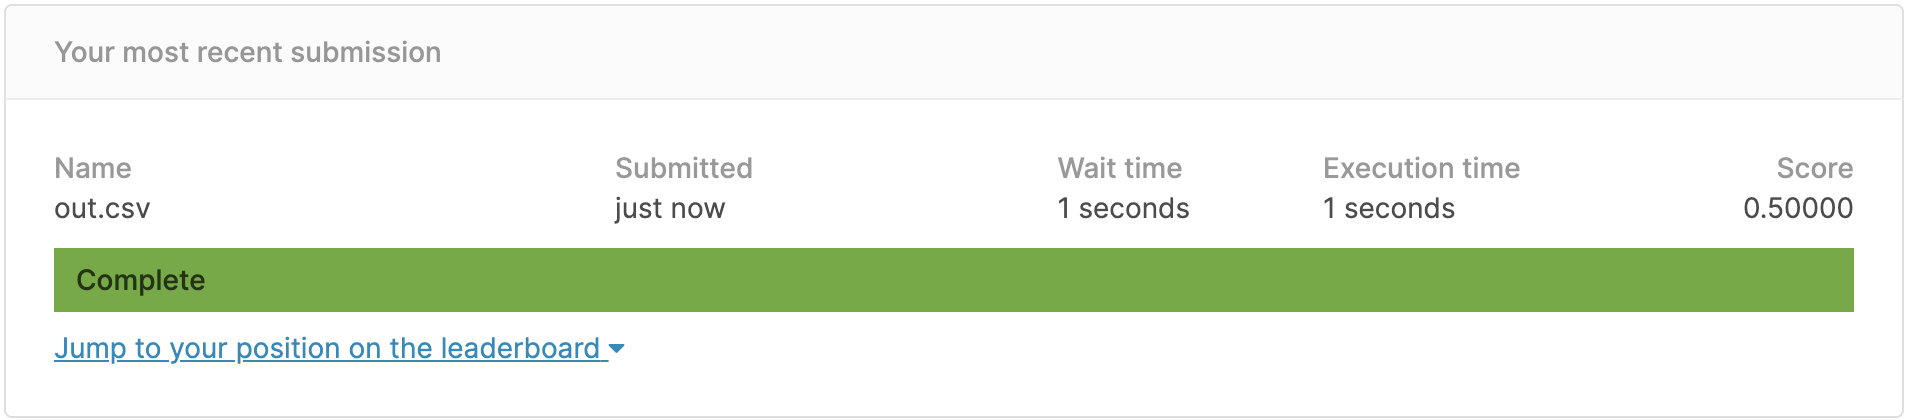

**[Problem 4] Feature engineering**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
ran_forest_model = Pipeline([('scale', StandardScaler()),
                            ('feature_selection', SelectFromModel(LinearSVC())),
                            ('classification', RandomForestClassifier())
                            ])
ran_forest_model.fit(train_df_after_preprocess.drop(columns='TARGET'), train_df_after_preprocess['TARGET'])
ran_forest_pred = ran_forest_model.predict(test_df_after_preprocess)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
output_df = pd.DataFrame({"SK_ID_CURR": test_index,
                          "TARGET": ran_forest_pred})
output_df.to_csv("./ran_forest.csv", index=False)

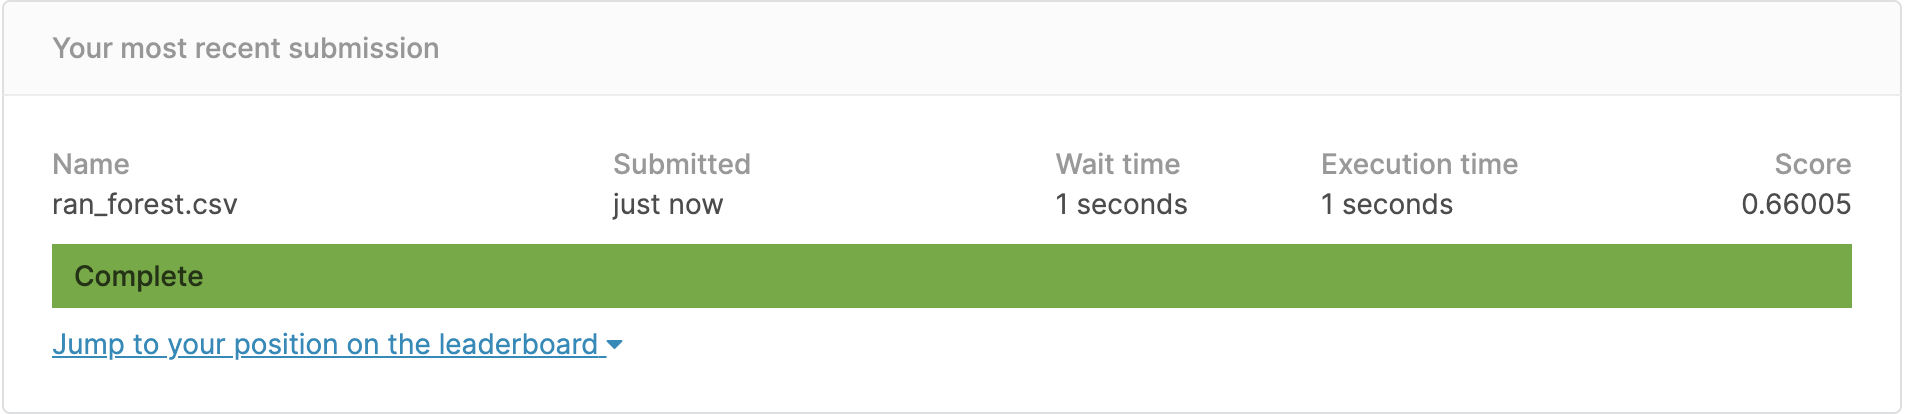

In [75]:
# Tuned Random Forest Classifier (with Feature Selection)
tuned_ran_forest_model = Pipeline([('scale', StandardScaler()),
                                   ('feature_selection', SelectFromModel(LinearSVC())),
                                   ('classification', RandomForestClassifier(n_estimators=250, 
                                                                             min_samples_split=10, 
                                                                             min_samples_leaf=5, 
                                                                             n_jobs=-1, 
                                                                             random_state=40,
                                                                             verbose=1))
                                                                            ])
tuned_ran_forest_model.fit(train_df_after_preprocess.drop(columns='TARGET'), train_df_after_preprocess['TARGET'])
tuned_ran_forest_pred = tuned_ran_forest_model.predict_proba(test_df_after_preprocess)[:, 1]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   43.9s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   57.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    2.4s
[Parallel(n_jobs=2)]: Done 250 out of 250 | elapsed:    3.0s finished


In [77]:
output_df = pd.DataFrame({"SK_ID_CURR": test_index,
                          "TARGET": tuned_ran_forest_pred})
output_df.to_csv("./tuned_ran_forest.csv", index=False)

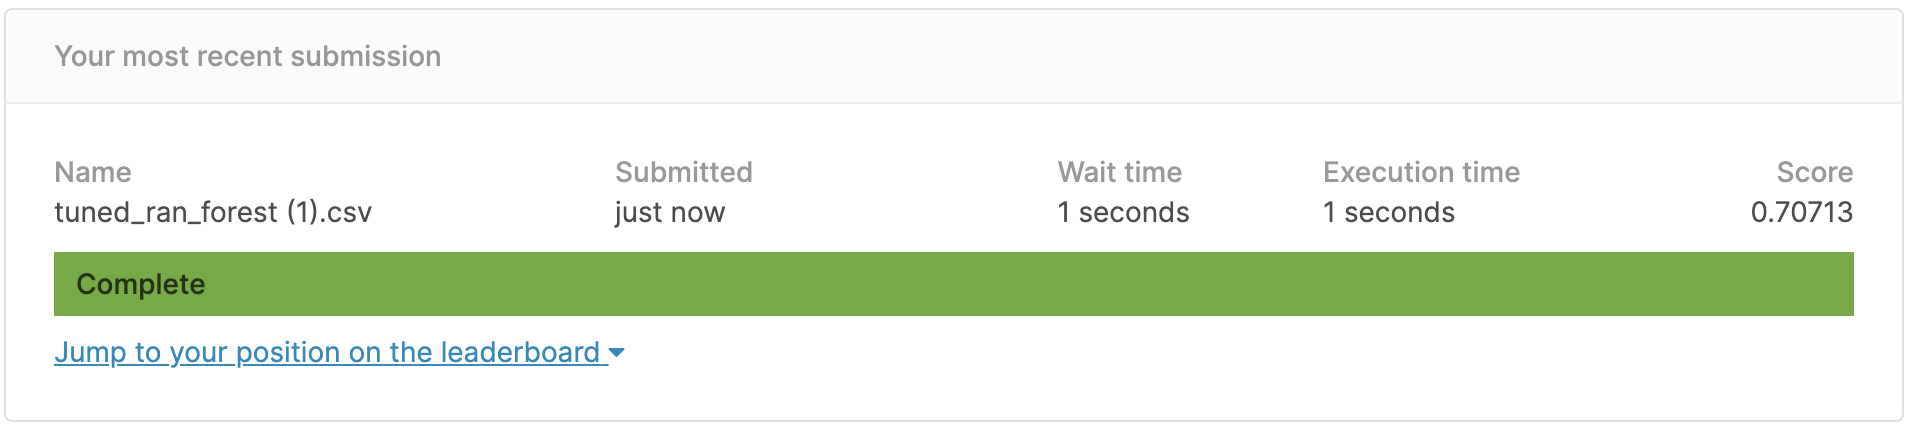

In [ ]:
# Linear Discriminant Analysis (with Feature Selection)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = Pipeline([('scale', StandardScaler()),
                     ('feature_selection', SelectFromModel(LinearSVC())),
                     ('classification', LinearDiscriminantAnalysis())
                     ])
lda_model.fit(train_df_after_preprocess.drop(columns='TARGET'), train_df_after_preprocess['TARGET'])
lda_pred = lda_model.predict(test_df_after_preprocess)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [73]:
output_df = pd.DataFrame({"SK_ID_CURR": test_index,
                          "TARGET": lda_pred})
output_df.to_csv("./lda.csv", index=False)

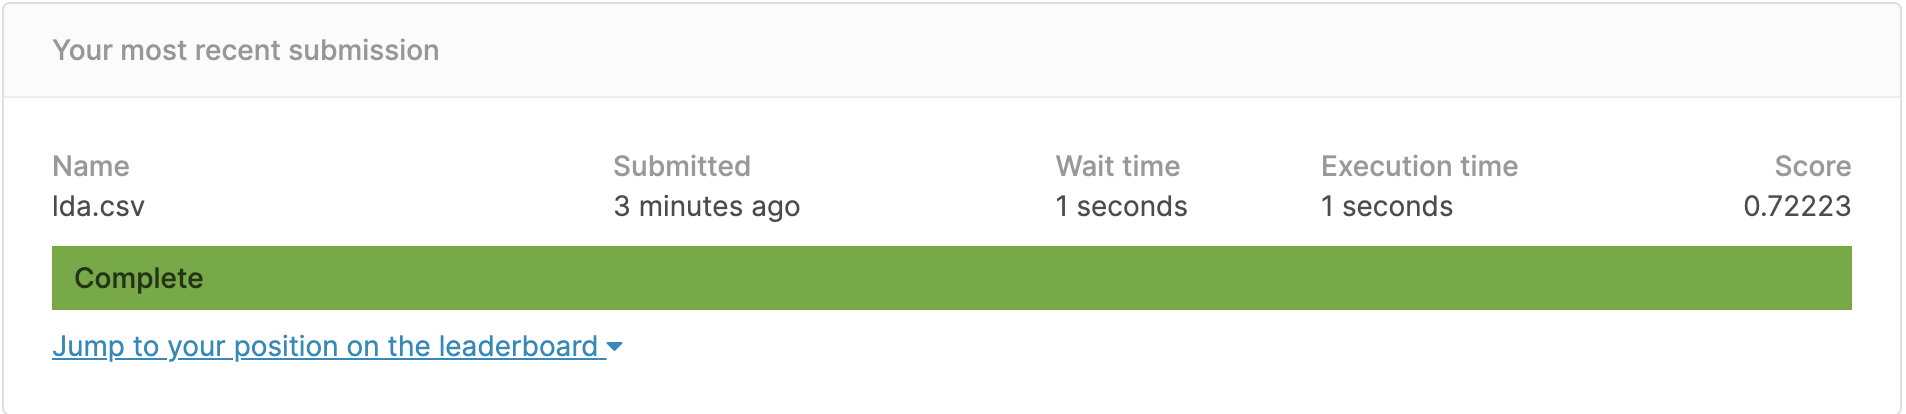

In [ ]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeClassifier
dec_tree_model = Pipeline([('scale', StandardScaler()),
                     ('feature_selection', SelectFromModel(LinearSVC())),
                     ('classification', DecisionTreeClassifier(random_state=40))
                     ])
dec_tree_model.fit(train_df_after_preprocess.drop(columns='TARGET'), train_df_after_preprocess['TARGET'])
dec_tree_pred = dec_tree_model.predict_proba(test_df_after_preprocess)[:, 1]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [74]:
output_df = pd.DataFrame({"SK_ID_CURR": test_index,
                          "TARGET": dec_tree_pred})
output_df.to_csv("./dec_tree.csv", index=False)

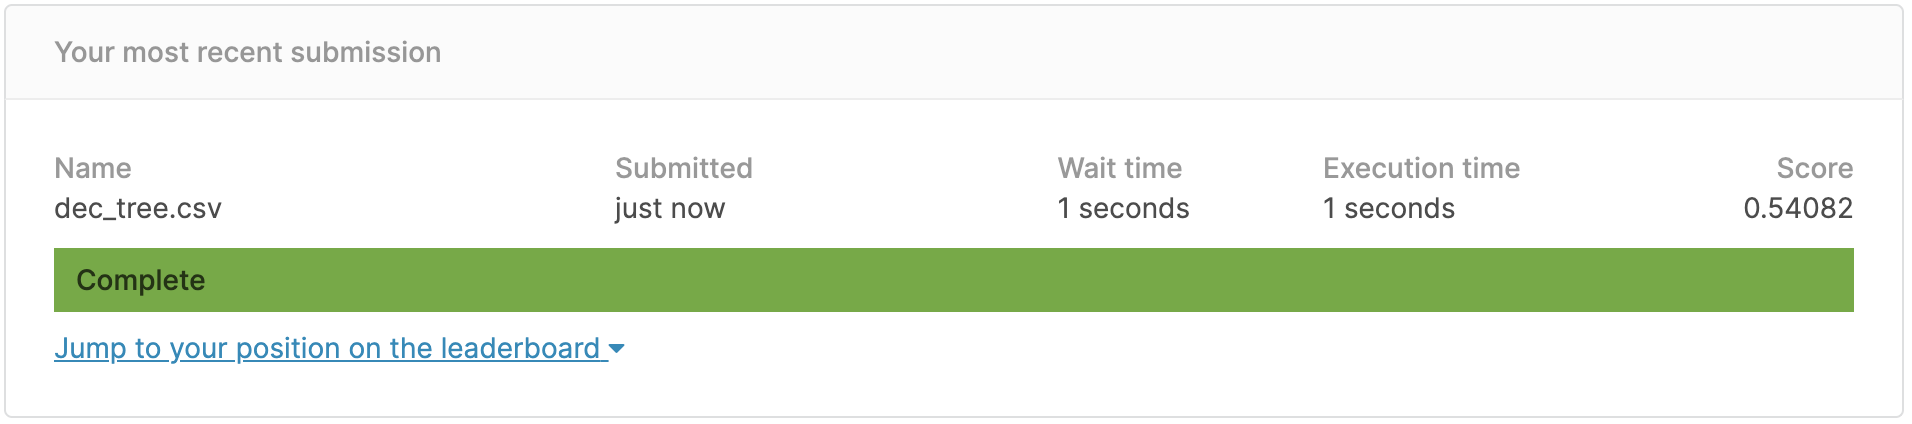

In [78]:
scores = {'1. Logistic Regression': [0.50000], 
          '2. Default Random Forest': [0.66005], 
          '3. Tuned Random Forest': [0.70713], 
          '4. Linear Discriminate Analysis': [0.72223],
          '5. Decision Tree': [0.54082]}
metric = ['ROC AUC Score']
df_results = pd.DataFrame(data=scores, index = metric).T
df_results

,ROC AUC Score
1. Logistic Regression,0.50000
2. Default Random Forest,0.66005
3. Tuned Random Forest,0.70713
4. Linear Discriminate Analysis,0.72223
5. Decision Tree,0.54082


LDA is the best model (out of 5 selected models) for this problem. It takes a while for running but the result is good.